In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

from useful_functions import load_transform_split, scatter_resid, scatter_predvreal, plot_performance

from RandomSeedSearchCV import RandomSeedSearchCV

#### Load data, clean, split into training/testing, etc.

In [15]:
X_train,X_test,y_train,y_test,w_train,w_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                                             weight='COHORT_CNT',
                                                                             expand=False,
                                                                             clean=True,
                                                                             split=0.1,
                                                                             return_pipeline=True,
                                                                             fmt='numpy',
                                                                             random_state=24)
w_train += 100
#print(X_train.shape,X_test.shape)
#Get cohort count for weights
#dftra,dftes = load_transform_split(target=None,
#                                      expand=False,
#                                      clean=False,
#                                      split=0.1,
#                                      return_pipeline=False,
#                                      fmt='pandas',
#                                      random_state=24)
#w_train = dftra['COHORT_CNT']+100
#w_test  = dftes['COHORT_CNT']+100

#### Try a test neural net.

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(20,activation='tanh',input_shape=[X_train.shape[1]],kernel_initializer='he_normal'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                400       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [19]:
w_train /= np.max(w_train)
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1,sample_weight=w_train)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Train on 58376 samples, validate on 6487 samples
Epoch 1/25
58376/58376 [==============================] - 9s 148us/sample - loss: 1.3151 - val_loss: 1.0930
Epoch 2/25
58376/58376 [==============================] - 8s 142us/sample - loss: 0.9765 - val_loss: 1.0653
Epoch 3/25
58376/58376 [==============================] - 8s 135us/sample - loss: 0.8793 - val_loss: 1.0001
Epoch 4/25
58376/58376 [==============================] - 9s 151us/sample - loss: 0.8384 - val_loss: 1.0069
Epoch 5/25
58376/58376 [==============================] - 9s 155us/sample - loss: 0.8085 - val_loss: 0.9429
Epoch 6/25
58376/58376 [==============================] - 8s 145us/sample - loss: 0.7931 - val_loss: 0.9473
Epoch 7/25
58376/58376 [==============================] - 10s 163us/sample - loss: 0.7888 - val_loss: 0.9046
Epoch 8/25
58376/58376 [==============================] - 8s 140us/sample - loss: 0.7611 - val_loss: 0.9304
Epoch 9/25
58376/58376 [==============================] - 8s 144us/sample - loss: 0.75

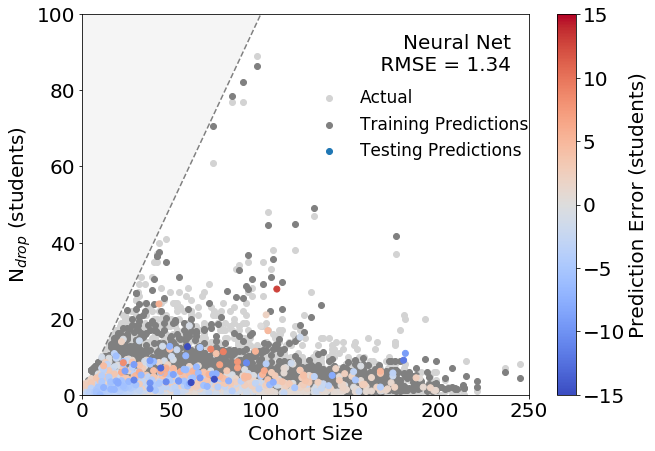

In [20]:
#model = keras.models.load_model("saved_models/weighted_neuralnet_attempt1.h5")
ax = plot_performance(model,'Neural Net',X_train,X_test,y_train,y_test,random_state=24)
ax.figure.savefig('figures/weighted_neuralnet_attempt1_summary.png',dpi=450)

In [12]:
model.save("saved_models/weighted_neuralnet_attempt1.h5")

In [ ]:
def randomseed_neuralnet_maker(seed,**kwargs):
    # Default Parameters!
    params = {
              'nhidden_lo':2,
              'nhidden_hi':5,
              'nhidden':   None,
        
              'activation_opts':['tanh',]
    }

In [46]:
N = X_train[:,0]
N = (N-np.min(N))*244+1
print(N)

[  1.          20.41869709  68.96543981 ... 214.60566797  10.70934854
 224.31501652]


In [38]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='pandas',
                                                              random_state=24)

In [41]:
X_train

,COHORT_CNT,per_capita_income,median_household_income,median_family_income,StudentNumber,STRatio,MathProficiency,ReadingProficiency,GENDER,DISABILITY_FLAG,DISADVANTAGED_FLAG,LEP_FLAG,FEDERAL_RACE_CODE_0,FEDERAL_RACE_CODE_1,FEDERAL_RACE_CODE_2,FEDERAL_RACE_CODE_3,FEDERAL_RACE_CODE_4,FEDERAL_RACE_CODE_5,FEDERAL_RACE_CODE_6
0,-0.554836,0.118868,0.812853,0.607501,0.764304,0.999323,0.995822,0.625152,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.475251,1.153725,1.691007,1.651256,0.126430,-1.315932,-0.395480,0.334535,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.276289,-0.927052,-1.133099,-1.115444,-0.971833,-0.389830,-0.830262,-0.537316,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.554836,1.265168,1.148096,1.179628,1.283410,0.536272,0.647997,0.915769,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.515044,0.220364,0.736114,0.541995,1.621029,0.999323,0.908866,1.061078,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57651,-0.554836,1.265168,1.148096,1.179628,0.800334,0.536272,1.343648,1.206386,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57652,-0.515044,1.265168,1.148096,1.179628,1.597009,0.536272,0.995822,1.206386,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57653,0.320597,-0.251605,-0.296963,-0.379426,0.903088,1.925426,0.734953,0.189227,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57654,-0.515044,-0.170291,-0.035455,-0.077138,0.457377,0.999323,0.387128,0.479844,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=False,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='pandas',
                                                              random_state=24)

In [49]:
min(X_train['COHORT_CNT'])

1